In [4]:
from google.colab import files


uploaded = files.upload()

Saving heart_failure_clinical_records_daataset.csv to heart_failure_clinical_records_daataset.csv



# Libraries

In [5]:

import io
# for basic operations
import numpy as np
import pandas as pd

# for data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from scipy.stats import pointbiserialr
import seaborn as sns

from scipy.stats import chi2_contingency

from scipy.stats import f_oneway
from sklearn.preprocessing import LabelEncoder

from scipy.stats import pointbiserialr, chi2_contingency

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Reed & describe The File





In [6]:


df = pd.read_csv(io.BytesIO(uploaded['heart_failure_clinical_records_daataset.csv']))
print(df)


      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('heart_failure_clinical_records_daataset.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 28.2 KB


In [9]:
df = pd.read_csv('heart_failure_clinical_records_daataset.csv')

# lets check the shape of the dataset
df.shape

(299, 12)

In [10]:
# Descriptive Statistics
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,1.00000


Heat map

> starting with it to see the correlations from the begining



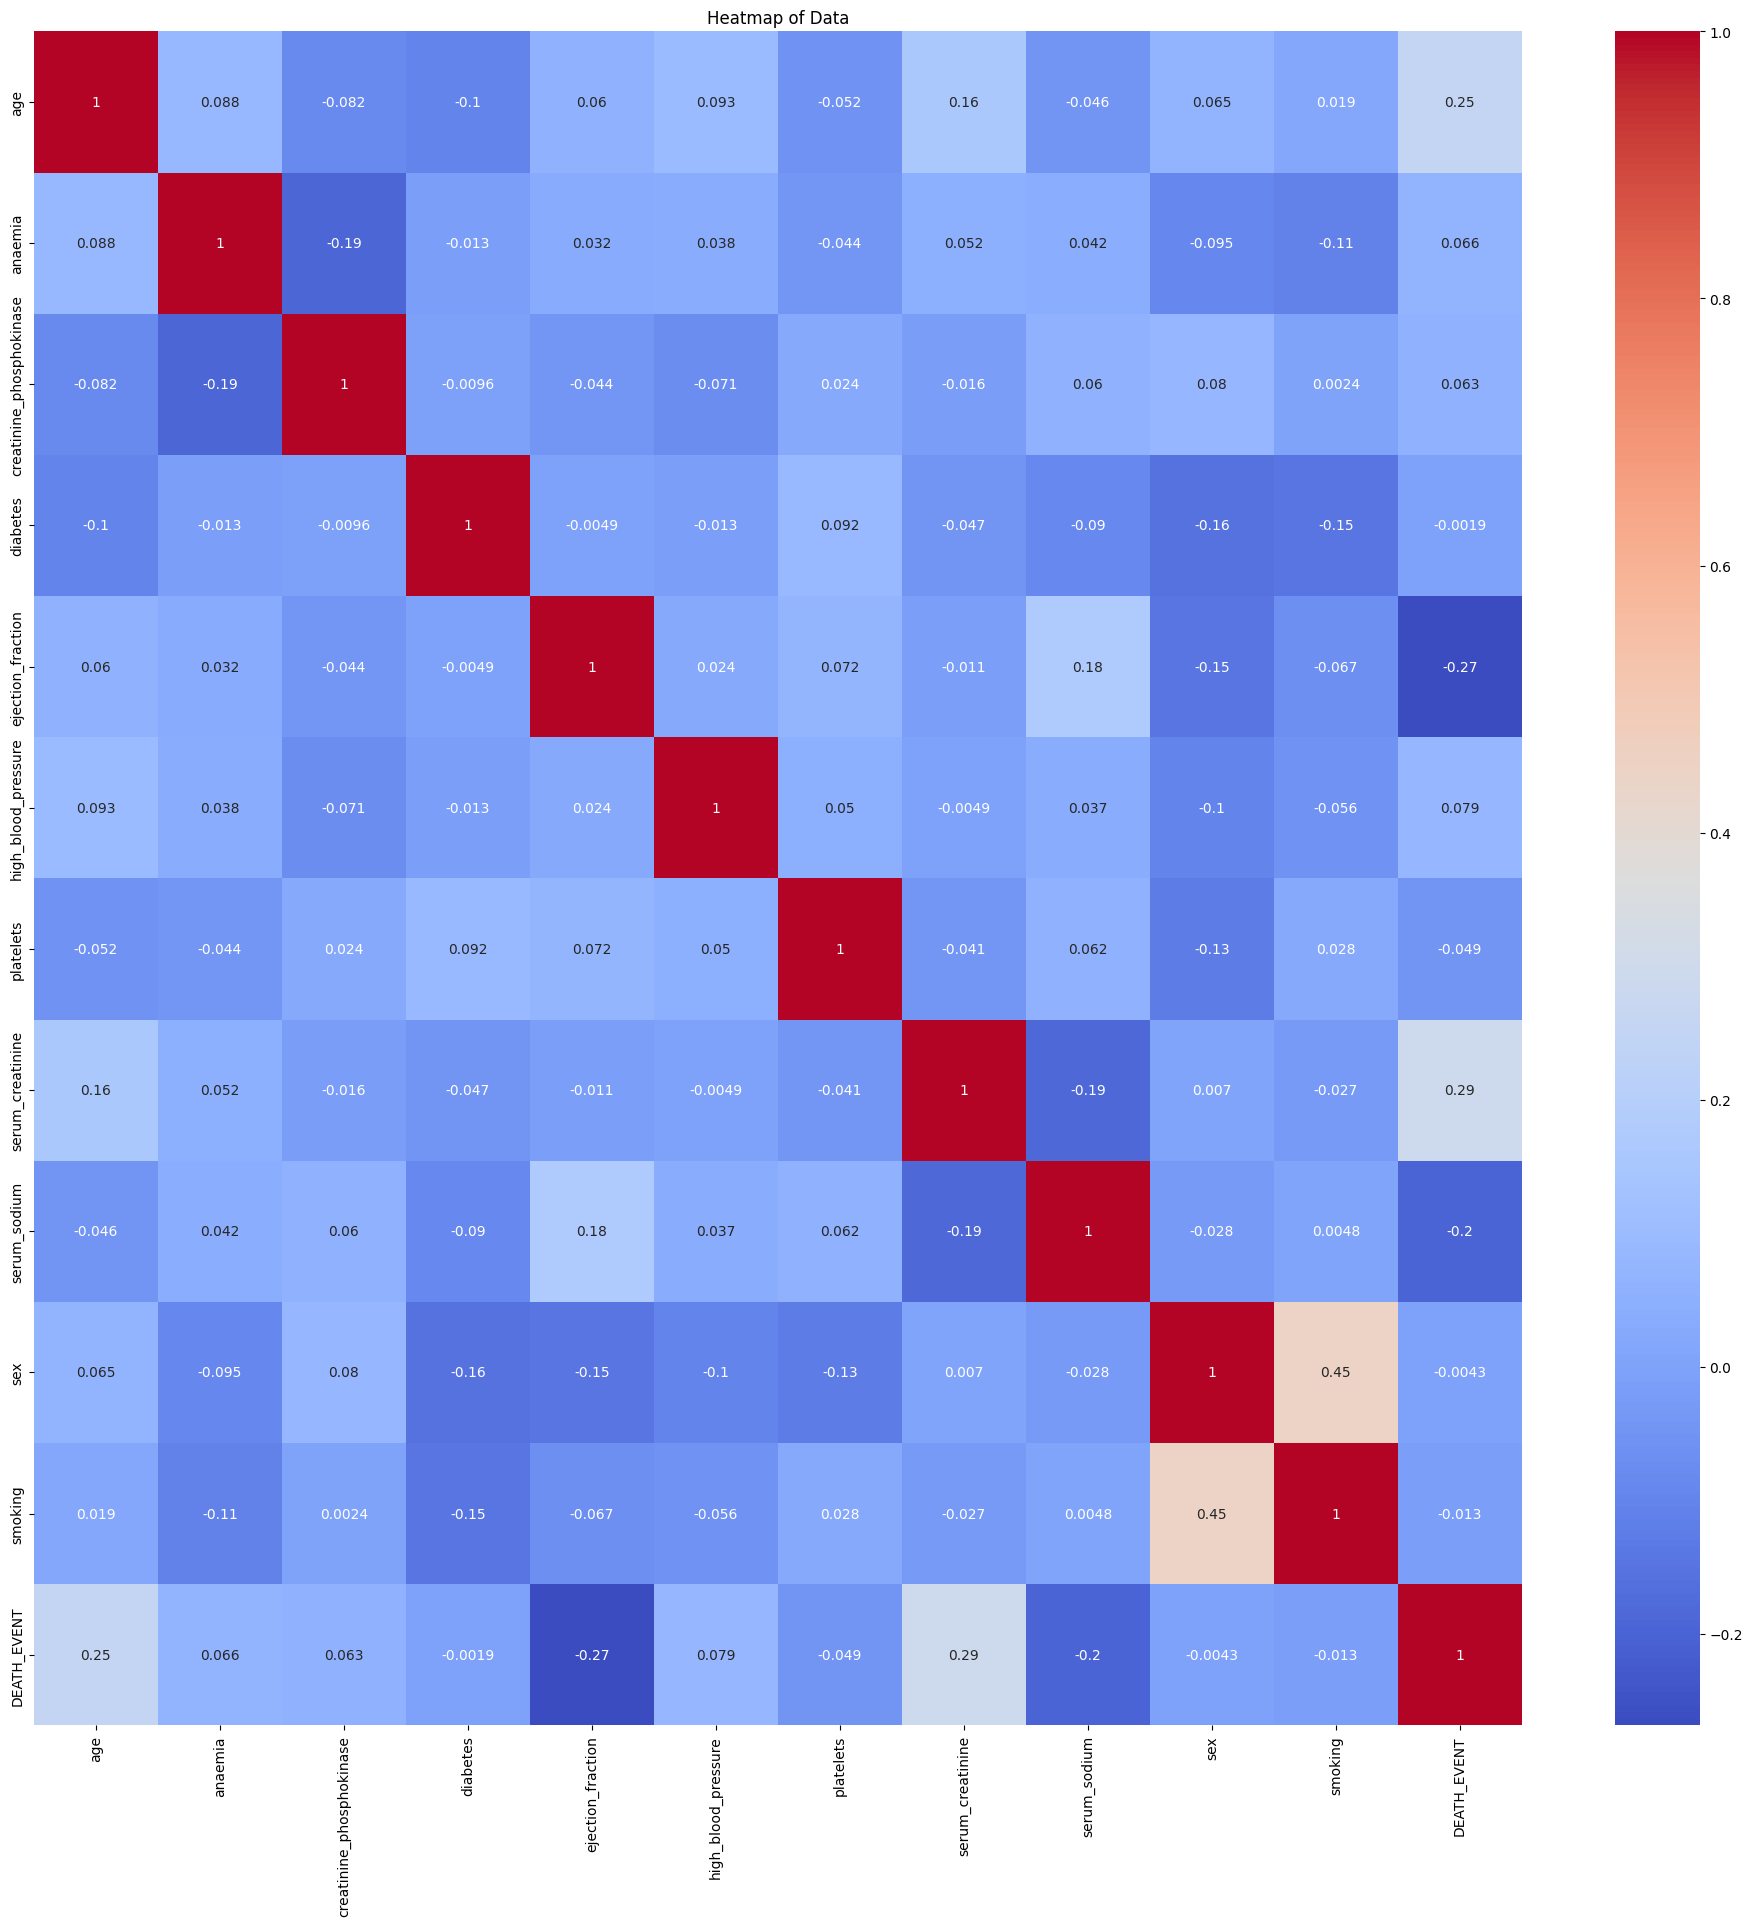

In [11]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Create a larger plot
plt.figure(figsize=(24, 22))

# Plot the heatmap
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')

# Set the title
plt.title('Heatmap of Data')

# Display the plot
plt.show()


# Data Cleaning

In [12]:
# Checking for missing values and data types
data.info()

# Checking for statistical summary to understand the distribution and potential outliers
data.describe()

# If there are missing values, we need to handle them. Let's check for missing values explicitly
missing_values = data.isnull().sum()
missing_values

# Display the summary statistics of the dataset to understand the distribution and identify potential outliers
data.describe()

# Removing any duplicates if present
data = data.drop_duplicates()

# Verify the data cleaning steps
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 28.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Da

In [13]:
# Load the dataset
file_path = 'heart_failure_clinical_records_daataset.csv'
data = pd.read_csv(file_path)

# Checking for missing values and data types
print(data.info())

# Checking for statistical summary to understand the distribution and potential outliers
print(data.describe())

# Removing any duplicates if present
data = data.drop_duplicates()

# Verify the data cleaning steps
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 28.2 KB
None
              age     anaemia  creatinine_phosphokinase    diabetes  

# Data Visualization

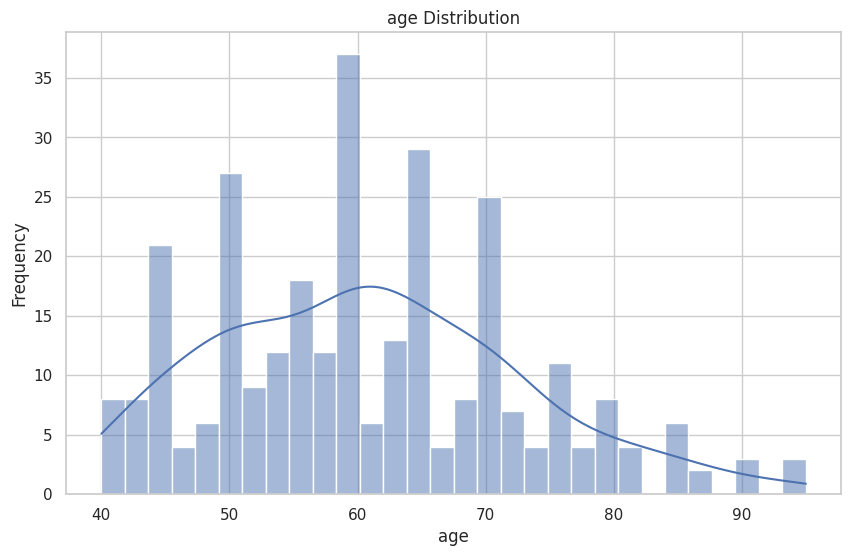

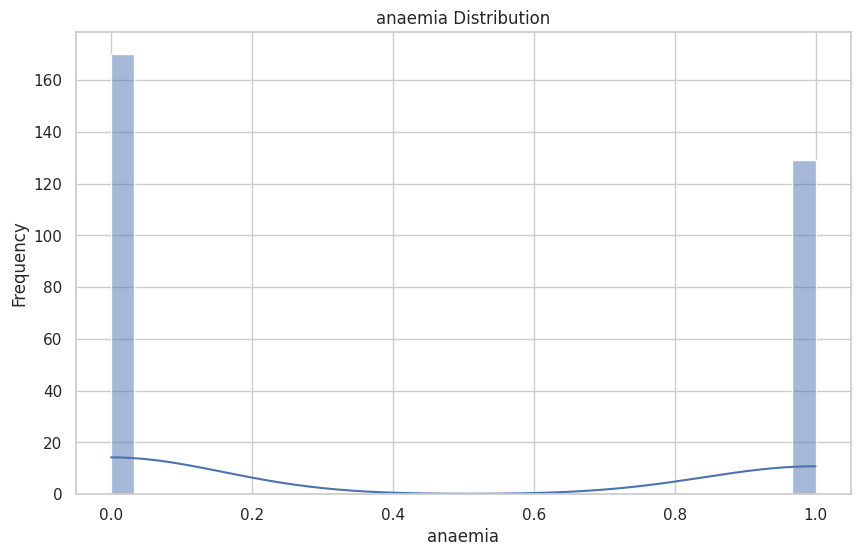

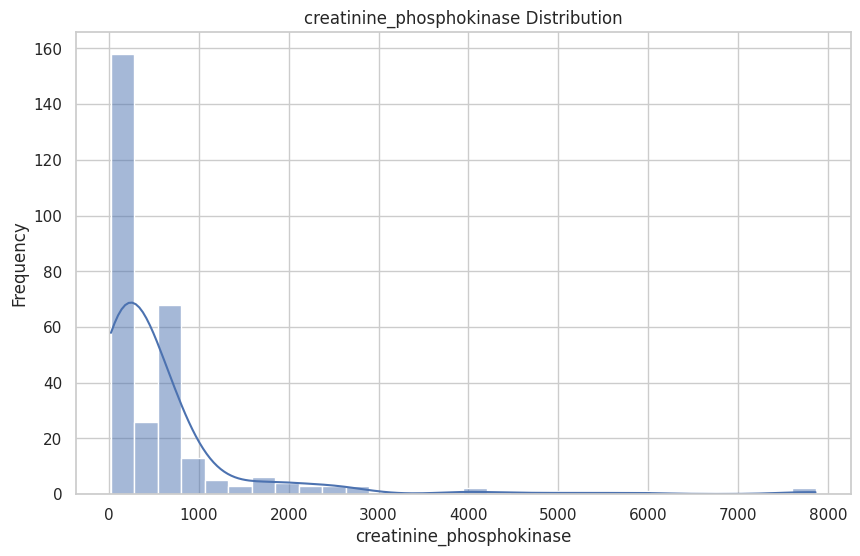

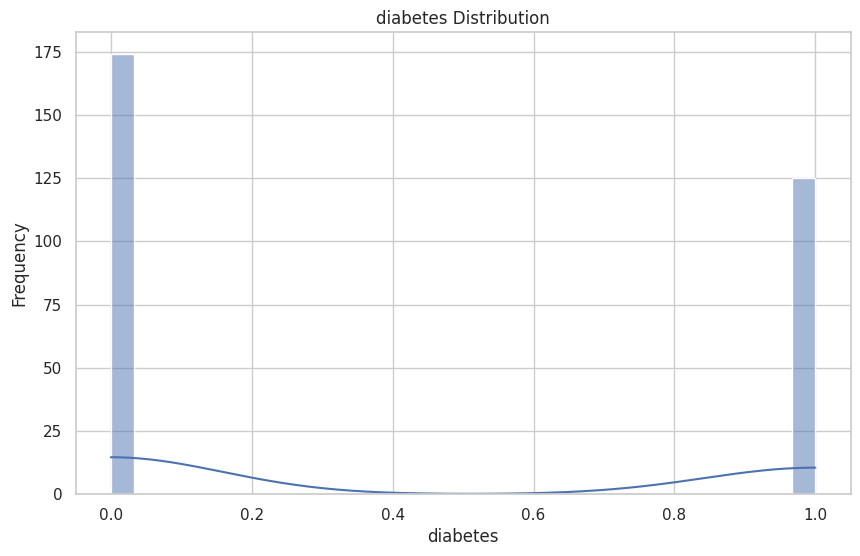

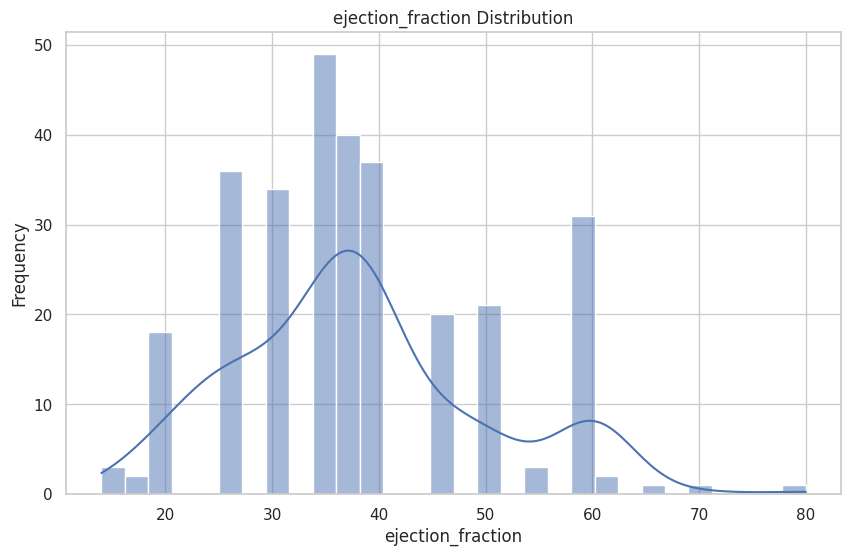

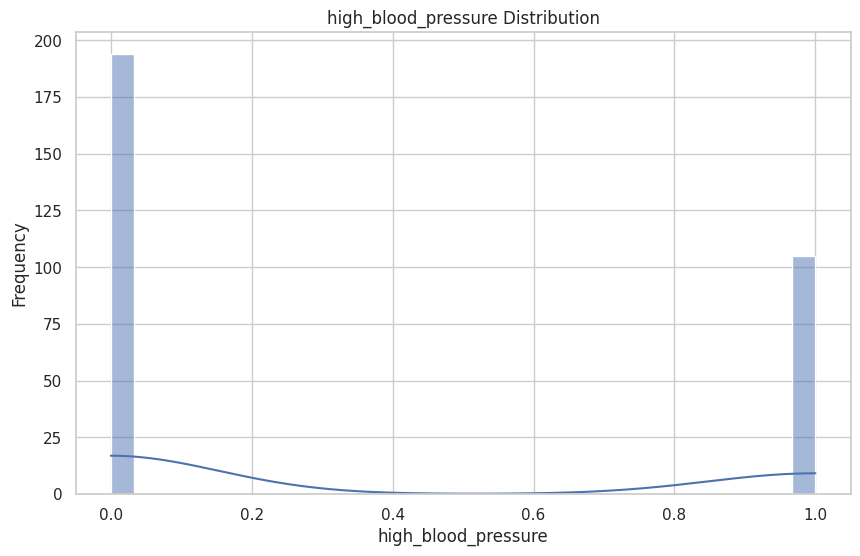

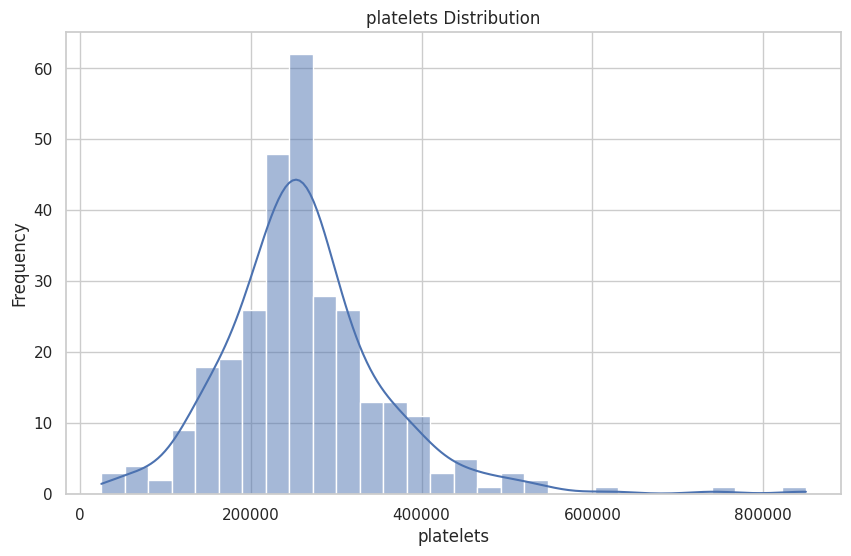

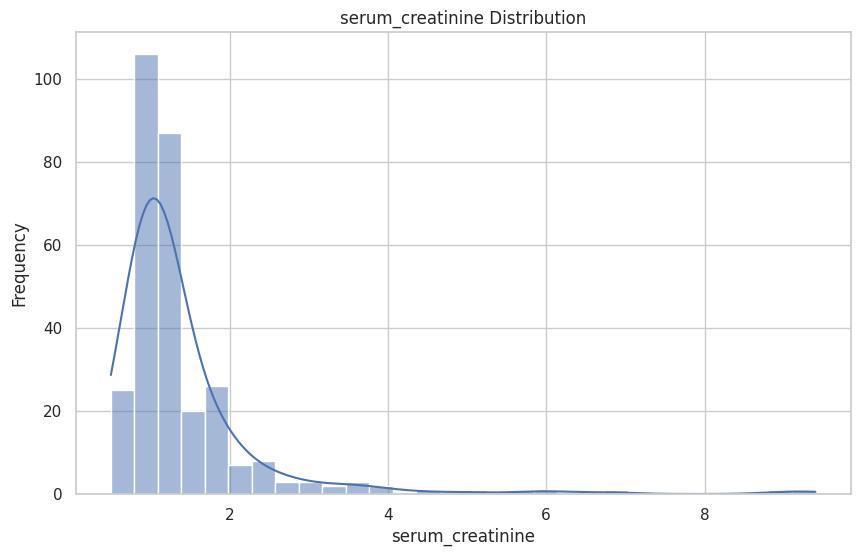

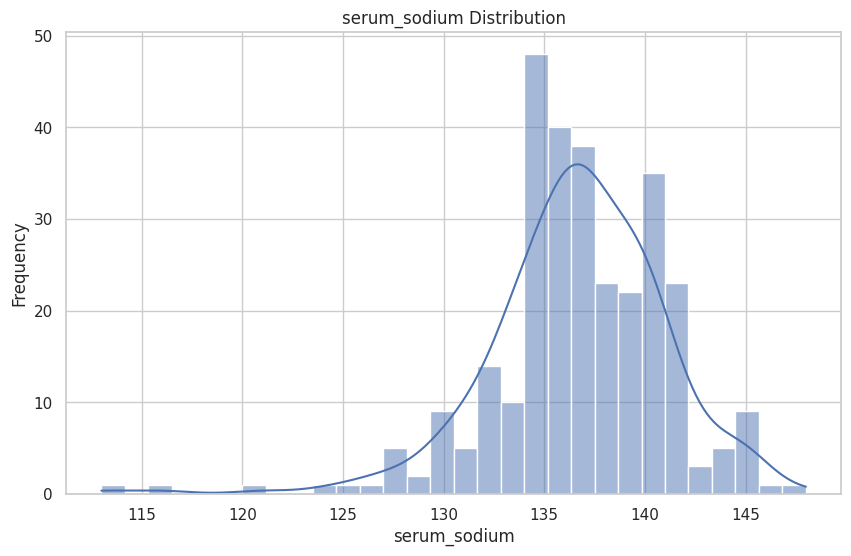

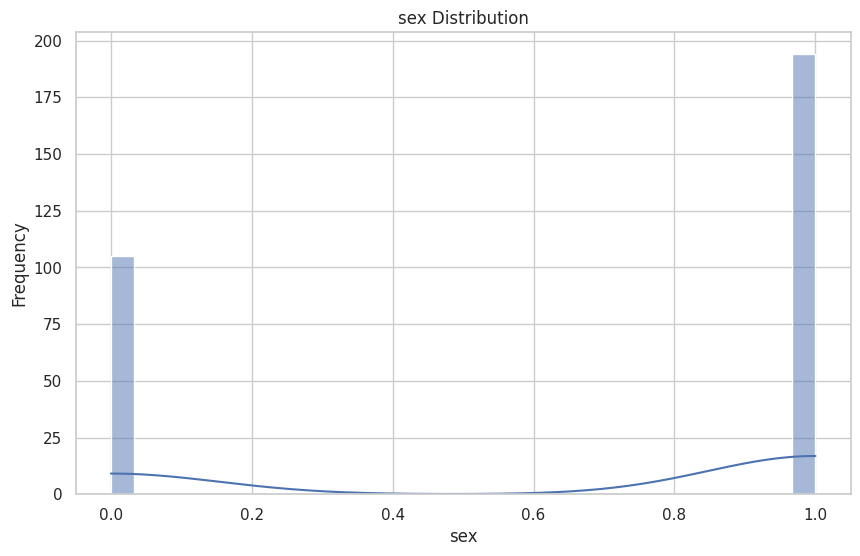

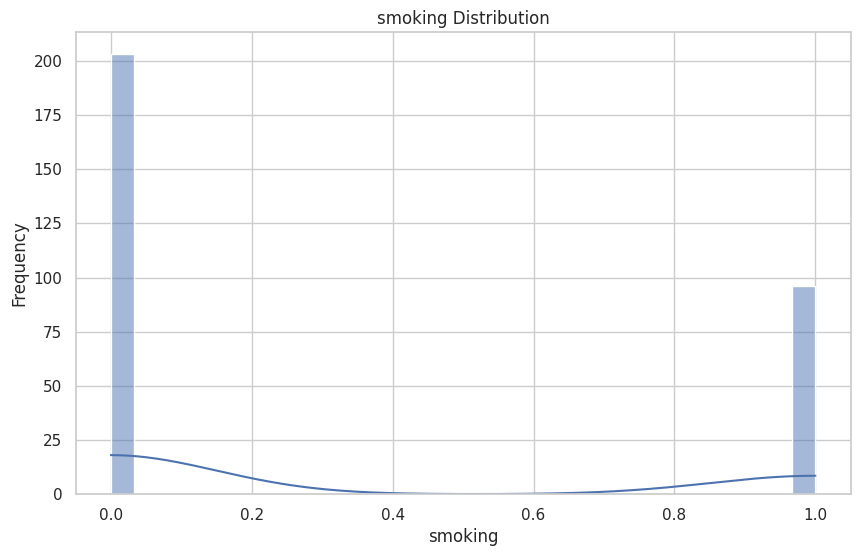

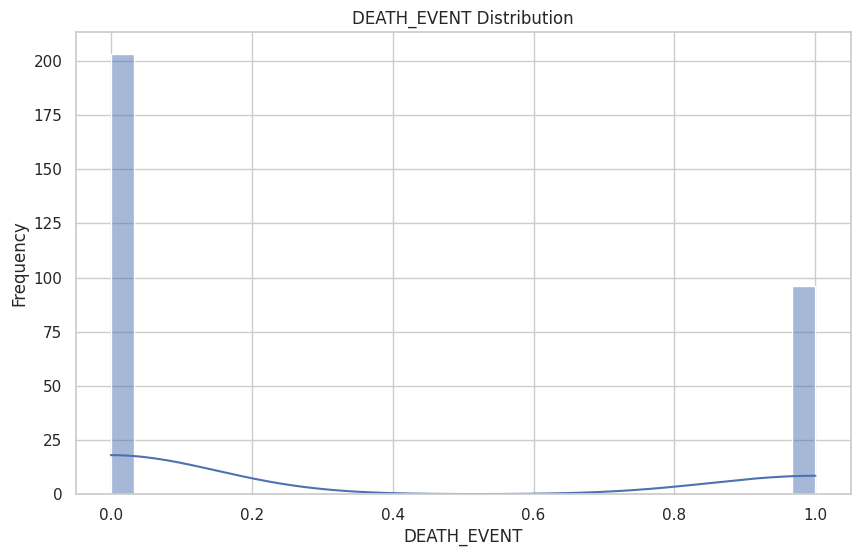

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reload the dataset
file_path = 'heart_failure_clinical_records_daataset.csv'
data = pd.read_csv(file_path)

# Set the style for the visualizations
sns.set(style="whitegrid")

# Function to plot histograms for each column
def plot_histogram(column):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Plot histograms for all columns
for column in data.columns:
    plot_histogram(column)


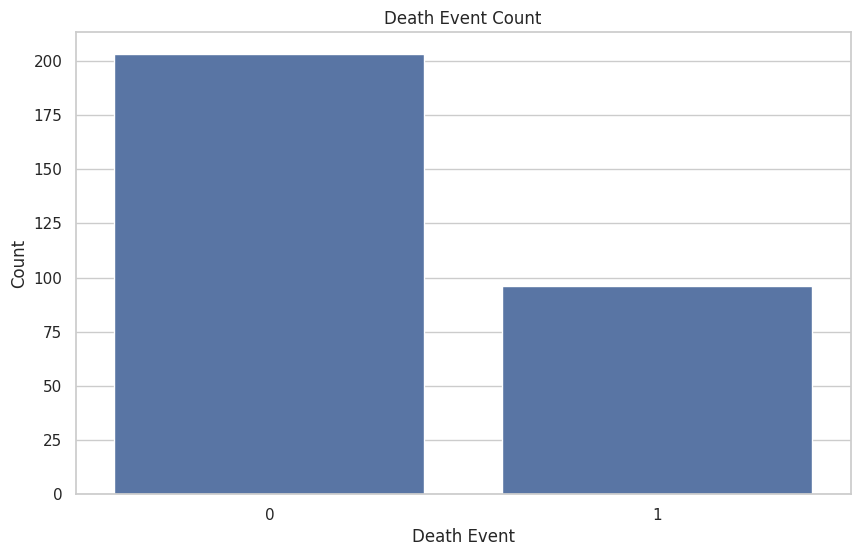

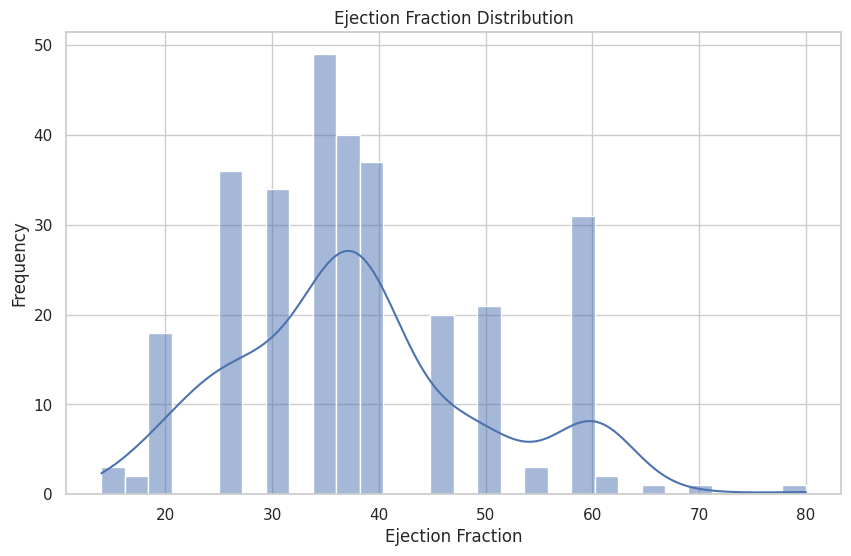

In [15]:
# Bar chart for DEATH_EVENT
plt.figure(figsize=(10, 6))
sns.countplot(x='DEATH_EVENT', data=data)
plt.title('Death Event Count')
plt.xlabel('Death Event')
plt.ylabel('Count')
plt.show()

# Histogram for ejection_fraction
plt.figure(figsize=(10, 6))
sns.histplot(data['ejection_fraction'], kde=True, bins=30)
plt.title('Ejection Fraction Distribution')
plt.xlabel('Ejection Fraction')
plt.ylabel('Frequency')
plt.show()


# Hypothesis

# Correlation matrix

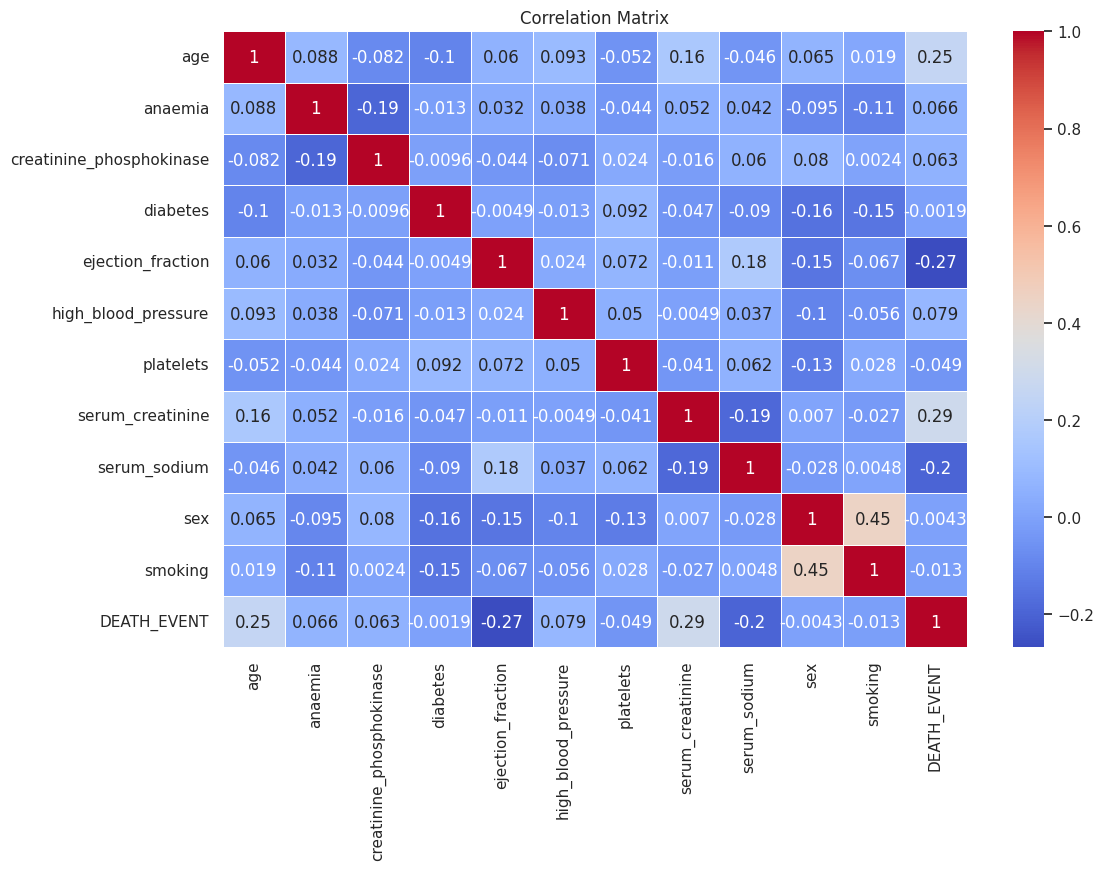

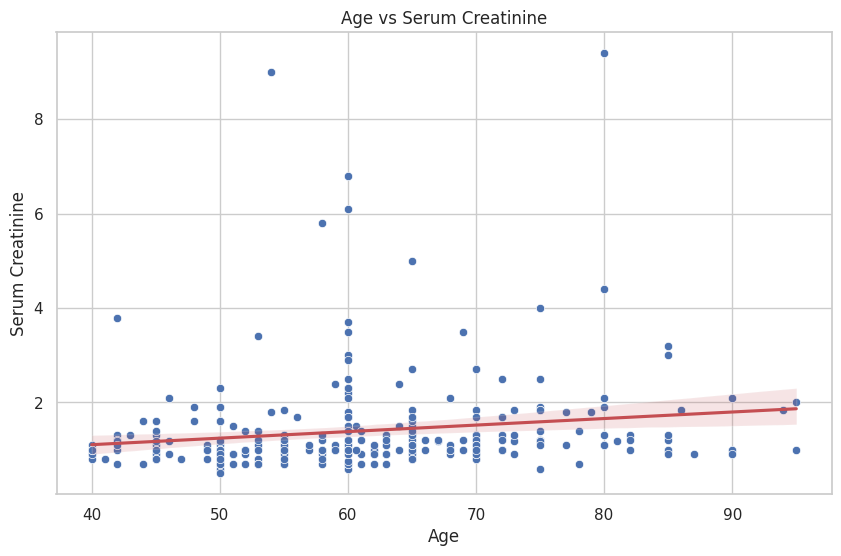

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('heart_failure_clinical_records_daataset.csv')

# Encode categorical variables if necessary
data_encoded = pd.get_dummies(data, drop_first=True)

# Correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = data_encoded.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Scatter plot with linear regression for age vs serum_creatinine
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='serum_creatinine', data=data_encoded)
sns.regplot(x='age', y='serum_creatinine', data=data_encoded, scatter=False, color='r')
plt.title('Age vs Serum Creatinine')
plt.xlabel('Age')
plt.ylabel('Serum Creatinine')
plt.show()


In [20]:


# Define the features and the target variable
X = data_encoded.drop('DEATH_EVENT', axis=1)
y = data_encoded['DEATH_EVENT']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)


Accuracy: 0.72
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.86      0.78        35
           1       0.72      0.52      0.60        25

    accuracy                           0.72        60
   macro avg       0.72      0.69      0.69        60
weighted avg       0.72      0.72      0.71        60



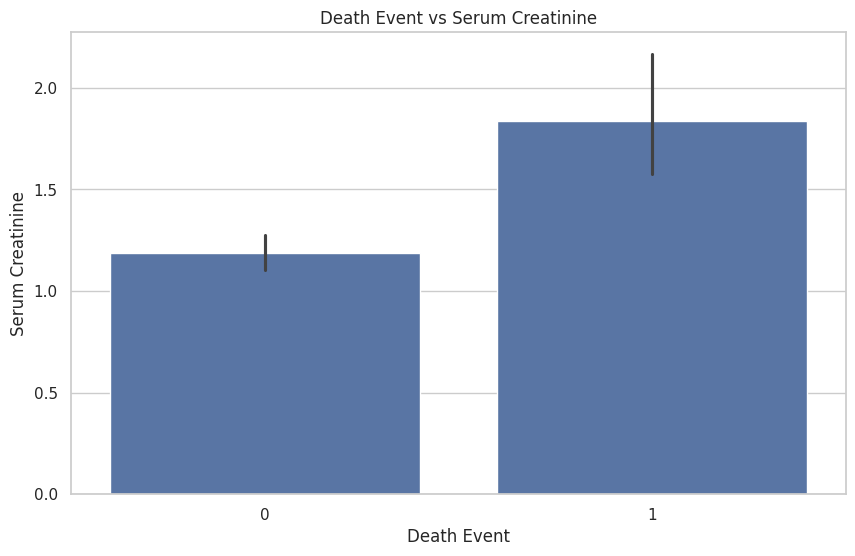

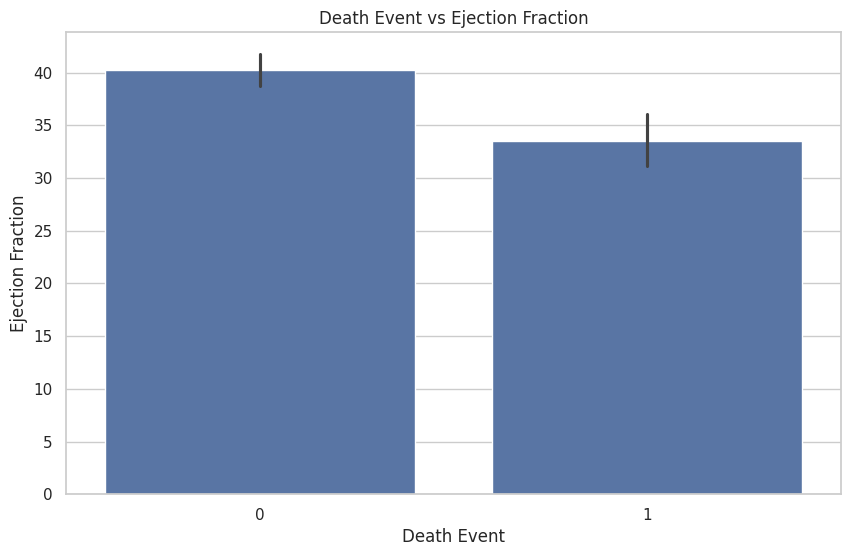

In [21]:
# Bar chart for DEATH_EVENT based on serum_creatinine levels
plt.figure(figsize=(10, 6))
sns.barplot(x='DEATH_EVENT', y='serum_creatinine', data=data_encoded)
plt.title('Death Event vs Serum Creatinine')
plt.xlabel('Death Event')
plt.ylabel('Serum Creatinine')
plt.show()

# Bar chart for DEATH_EVENT based on ejection_fraction
plt.figure(figsize=(10, 6))
sns.barplot(x='DEATH_EVENT', y='ejection_fraction', data=data_encoded)
plt.title('Death Event vs Ejection Fraction')
plt.xlabel('Death Event')
plt.ylabel('Ejection Fraction')
plt.show()


# Correlations

> To see our Hypothesis and have answers for our research questions



Hypothesis 1: Serum Creatinine and Death Event
Point-Biserial Correlation coefficient: 0.2942775609841492
P-value: 2.190197854897928e-07



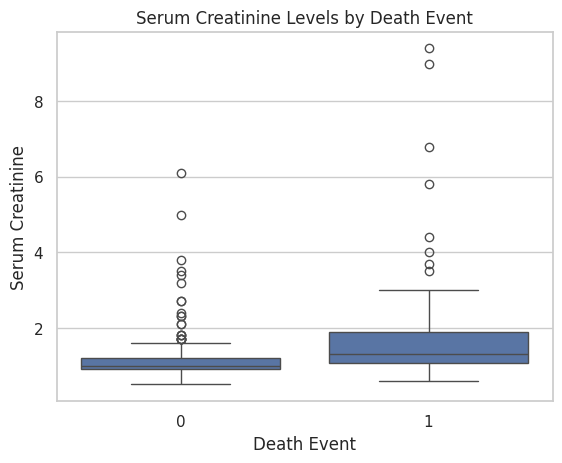

Hypothesis 2: Ejection Fraction and Death Event
Point-Biserial Correlation coefficient: -0.26860331239406215
P-value: 2.4528974182088576e-06



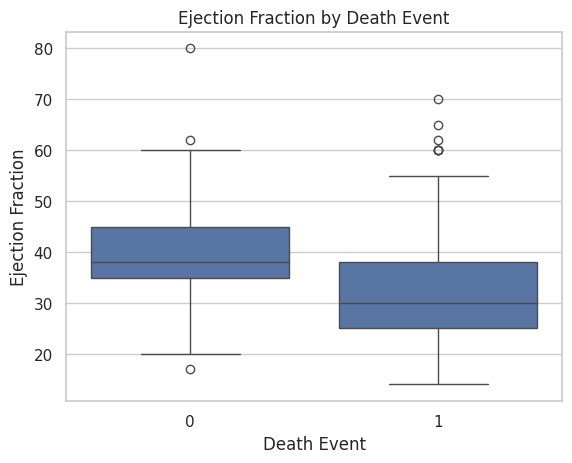

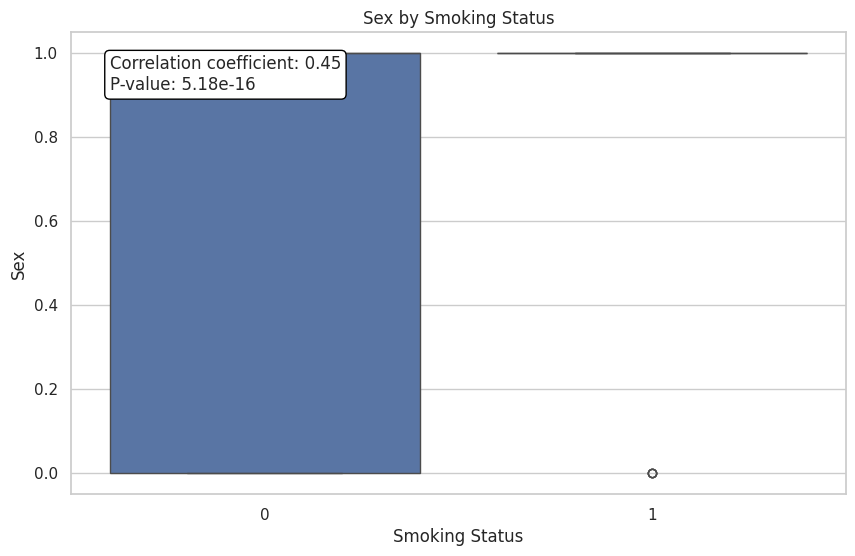

In [22]:


# Load the dataset
data = pd.read_csv('heart_failure_clinical_records_daataset.csv')

# Hypothesis 1: Correlation between Serum Creatinine and Death Event
corr_coefficient, p_value = pointbiserialr(data['serum_creatinine'], data['DEATH_EVENT'])
print(f'Hypothesis 1: Serum Creatinine and Death Event')
print(f'Point-Biserial Correlation coefficient: {corr_coefficient}')
print(f'P-value: {p_value}\n')

sns.boxplot(x='DEATH_EVENT', y='serum_creatinine', data=data)
plt.title('Serum Creatinine Levels by Death Event')
plt.xlabel('Death Event')
plt.ylabel('Serum Creatinine')
plt.show()

# Hypothesis 2: Correlation between Ejection Fraction and Death Event
corr_coefficient, p_value = pointbiserialr(data['ejection_fraction'], data['DEATH_EVENT'])
print(f'Hypothesis 2: Ejection Fraction and Death Event')
print(f'Point-Biserial Correlation coefficient: {corr_coefficient}')
print(f'P-value: {p_value}\n')

sns.boxplot(x='DEATH_EVENT', y='ejection_fraction', data=data)
plt.title('Ejection Fraction by Death Event')
plt.xlabel('Death Event')
plt.ylabel('Ejection Fraction')
plt.show()

# Hypothesis 3: Relationship between Age and Smoking
# Hypothesis 3: Relationship between Sex and Smoking
corr_coefficient, p_value = pointbiserialr(data['sex'], data['smoking'])

# Create box plot for Hypothesis 3
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoking', y='sex', data=data)
plt.title('Sex by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Sex')
plt.annotate(f'Correlation coefficient: {corr_coefficient:.2f}\nP-value: {p_value:.2e}',
             xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, ha='left', va='top',
             bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))
plt.show()



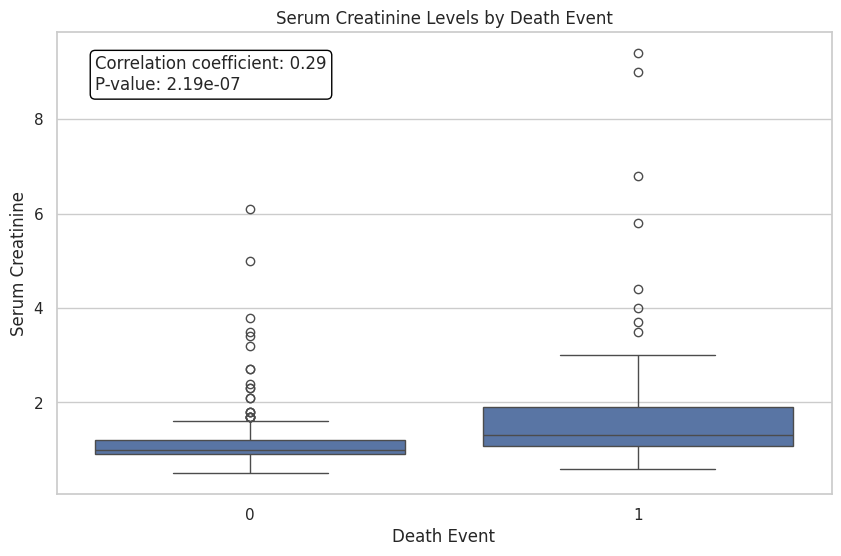

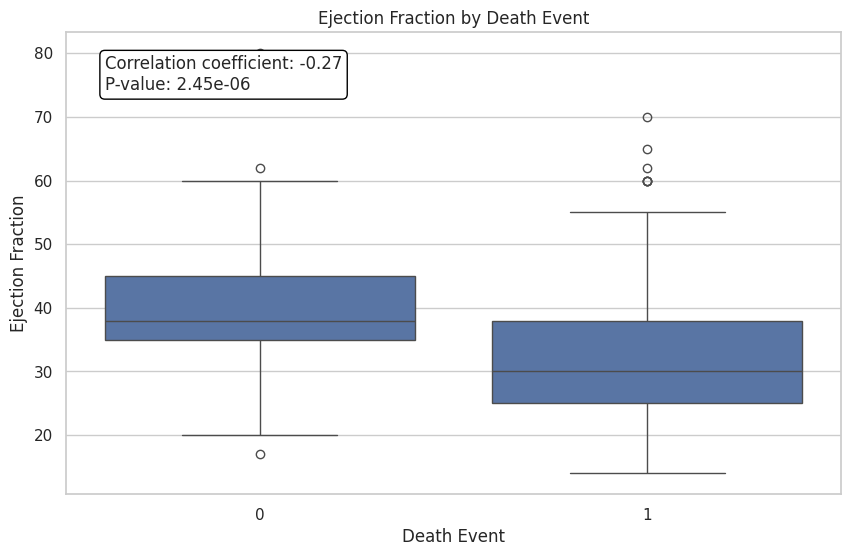

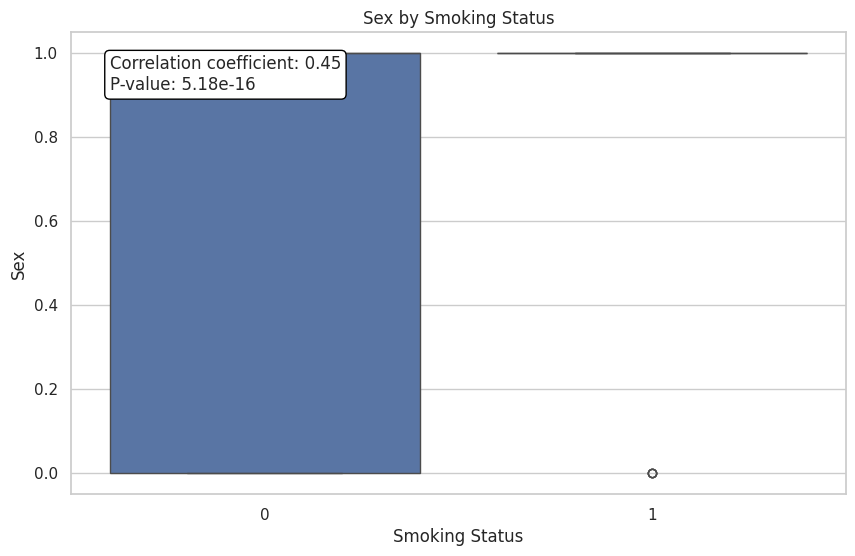

In [23]:

# Load the dataset
data = pd.read_csv('heart_failure_clinical_records_daataset.csv')

# Hypothesis 1: Correlation between Serum Creatinine and Death Event
corr_coefficient, p_value = pointbiserialr(data['serum_creatinine'], data['DEATH_EVENT'])

# Create box plot for Hypothesis 1
plt.figure(figsize=(10, 6))
sns.boxplot(x='DEATH_EVENT', y='serum_creatinine', data=data)
plt.title('Serum Creatinine Levels by Death Event')
plt.xlabel('Death Event')
plt.ylabel('Serum Creatinine')
plt.annotate(f'Correlation coefficient: {corr_coefficient:.2f}\nP-value: {p_value:.2e}',
             xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, ha='left', va='top',
             bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))
plt.show()

# Hypothesis 2: Correlation between Ejection Fraction and Death Event
corr_coefficient, p_value = pointbiserialr(data['ejection_fraction'], data['DEATH_EVENT'])

# Create box plot for Hypothesis 2
plt.figure(figsize=(10, 6))
sns.boxplot(x='DEATH_EVENT', y='ejection_fraction', data=data)
plt.title('Ejection Fraction by Death Event')
plt.xlabel('Death Event')
plt.ylabel('Ejection Fraction')
plt.annotate(f'Correlation coefficient: {corr_coefficient:.2f}\nP-value: {p_value:.2e}',
             xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, ha='left', va='top',
             bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))
plt.show()

# Hypothesis 3: Relationship between Sex and Smoking
corr_coefficient, p_value = pointbiserialr(data['sex'], data['smoking'])

# Create box plot for Hypothesis 3
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoking', y='sex', data=data)
plt.title('Sex by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Sex')
plt.annotate(f'Correlation coefficient: {corr_coefficient:.2f}\nP-value: {p_value:.2e}',
             xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, ha='left', va='top',
             bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))
plt.show()


In [24]:


# Create bins for serum_creatinine
data_encoded['serum_creatinine_bins'] = pd.cut(data_encoded['serum_creatinine'], bins=[0, 1, 2, 3, 4, 5, np.inf], labels=['0-1', '1-2', '2-3', '3-4', '4-5', '5+'])

# Create a contingency table
contingency_table = pd.crosstab(data_encoded['serum_creatinine_bins'], data_encoded['DEATH_EVENT'])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-Square Test for serum_creatinine and DEATH_EVENT")
print(f"Chi2 Statistic: {chi2}")
print(f"P-Value: {p}")


Chi-Square Test for serum_creatinine and DEATH_EVENT
Chi2 Statistic: 29.45336376246811
P-Value: 1.8890703120631695e-05


In [25]:
# Create bins for ejection_fraction
data_encoded['ejection_fraction_bins'] = pd.cut(data_encoded['ejection_fraction'], bins=[0, 10, 20, 30, 40, 50, 60, 70, np.inf], labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70+'])

# Create a contingency table
contingency_table = pd.crosstab(data_encoded['ejection_fraction_bins'], data_encoded['DEATH_EVENT'])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-Square Test for ejection_fraction and DEATH_EVENT")
print(f"Chi2 Statistic: {chi2}")
print(f"P-Value: {p}")


Chi-Square Test for ejection_fraction and DEATH_EVENT
Chi2 Statistic: 53.20903785019989
P-Value: 1.0648885732031342e-09


In [26]:


# Load the dataset
file_path = 'heart_failure_clinical_records_daataset.csv'
data = pd.read_csv(file_path)

# One-hot encoding the categorical columns 'sex' and 'smoking'
data_encoded = pd.get_dummies(data, columns=['sex', 'smoking'], drop_first=True)

# Chi-Square Test for serum_creatinine and DEATH_EVENT
data_encoded['serum_creatinine_bins'] = pd.cut(data_encoded['serum_creatinine'], bins=[0, 1, 2, 3, 4, 5, np.inf], labels=['0-1', '1-2', '2-3', '3-4', '4-5', '5+'])
contingency_table = pd.crosstab(data_encoded['serum_creatinine_bins'], data_encoded['DEATH_EVENT'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Test for serum_creatinine and DEATH_EVENT")
print(f"Chi2 Statistic: {chi2}")
print(f"P-Value: {p}")

# Chi-Square Test for ejection_fraction and DEATH_EVENT
data_encoded['ejection_fraction_bins'] = pd.cut(data_encoded['ejection_fraction'], bins=[0, 10, 20, 30, 40, 50, 60, 70, np.inf], labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70+'])
contingency_table = pd.crosstab(data_encoded['ejection_fraction_bins'], data_encoded['DEATH_EVENT'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Test for ejection_fraction and DEATH_EVENT")
print(f"Chi2 Statistic: {chi2}")
print(f"P-Value: {p}")


Chi-Square Test for serum_creatinine and DEATH_EVENT
Chi2 Statistic: 29.45336376246811
P-Value: 1.8890703120631695e-05
Chi-Square Test for ejection_fraction and DEATH_EVENT
Chi2 Statistic: 53.20903785019989
P-Value: 1.0648885732031342e-09


In [27]:


# Load the data into a DataFrame (adjust the filename as needed)
df = pd.read_csv('heart_failure_clinical_records_daataset.csv')

# Display the first few rows of the dataframe to ensure it's loaded correctly
print(df.head())

# Assuming 'data_encoded' is the dataframe you want to work with
data_encoded = df.copy()

# Ensure the columns 'sex' and 'smoking' exist in the dataframe
if 'sex' not in data_encoded.columns or 'smoking' not in data_encoded.columns:
    raise ValueError("The dataframe must contain 'sex' and 'smoking' columns.")

# Create a contingency table for sex and smoking
contingency_table_sex_smoking = pd.crosstab(data_encoded['sex'], data_encoded['smoking'])

# Perform the Chi-Square test for sex and smoking
chi2_sex_smoking, p_sex_smoking, dof_sex_smoking, expected_sex_smoking = chi2_contingency(contingency_table_sex_smoking)

# Print the results for sex and smoking
print(f"Chi-Square Test for sex and smoking")
print(f"Chi2 Statistic: {chi2_sex_smoking}")
print(f"P-Value: {p_sex_smoking}")
print(f"Degrees of Freedom: {dof_sex_smoking}")
print("Expected Frequencies:")
print(expected_sex_smoking)


    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  DEATH_EVENT  
0        0            1  
1        0            1  
2        1            1  


# Scatter plot with linear regression

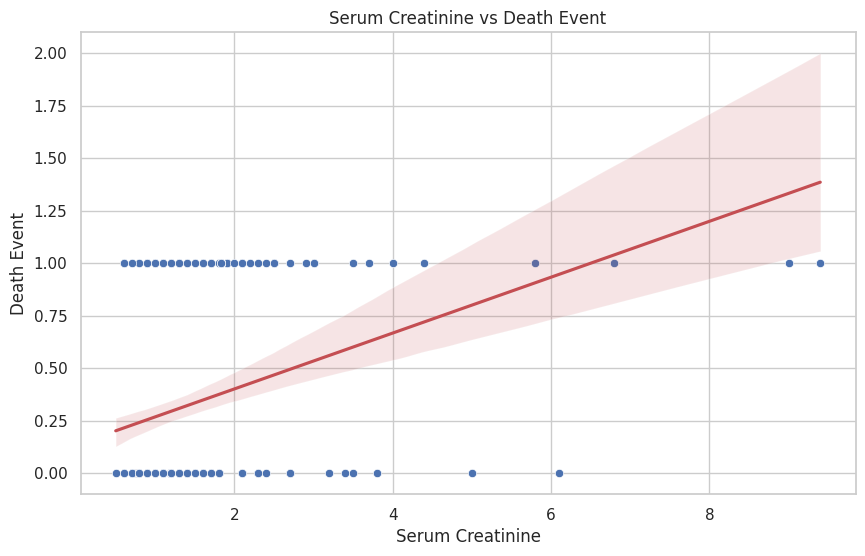

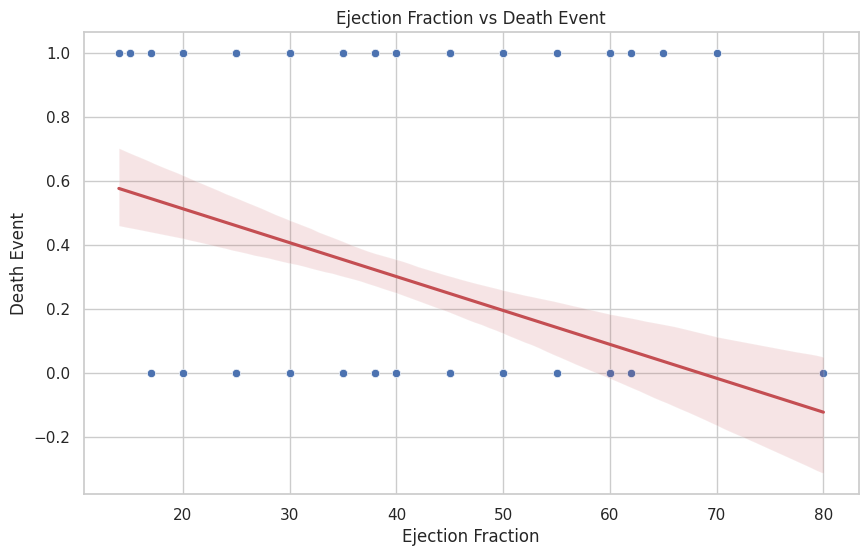

In [28]:


# Scatter plot with linear regression for serum_creatinine vs DEATH_EVENT
plt.figure(figsize=(10, 6))
sns.scatterplot(x='serum_creatinine', y='DEATH_EVENT', data=data_encoded)
sns.regplot(x='serum_creatinine', y='DEATH_EVENT', data=data_encoded, scatter=False, color='r')
plt.title('Serum Creatinine vs Death Event')
plt.xlabel('Serum Creatinine')
plt.ylabel('Death Event')
plt.show()

# Scatter plot with linear regression for ejection_fraction vs DEATH_EVENT
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ejection_fraction', y='DEATH_EVENT', data=data_encoded)
sns.regplot(x='ejection_fraction', y='DEATH_EVENT', data=data_encoded, scatter=False, color='r')
plt.title('Ejection Fraction vs Death Event')
plt.xlabel('Ejection Fraction')
plt.ylabel('Death Event')
plt.show()


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define the features and the target variable based on hypotheses
X = data_encoded[['serum_creatinine', 'ejection_fraction']]
y = data_encoded['DEATH_EVENT']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)


Accuracy: 0.68
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.74      0.73        35
           1       0.62      0.60      0.61        25

    accuracy                           0.68        60
   macro avg       0.67      0.67      0.67        60
weighted avg       0.68      0.68      0.68        60



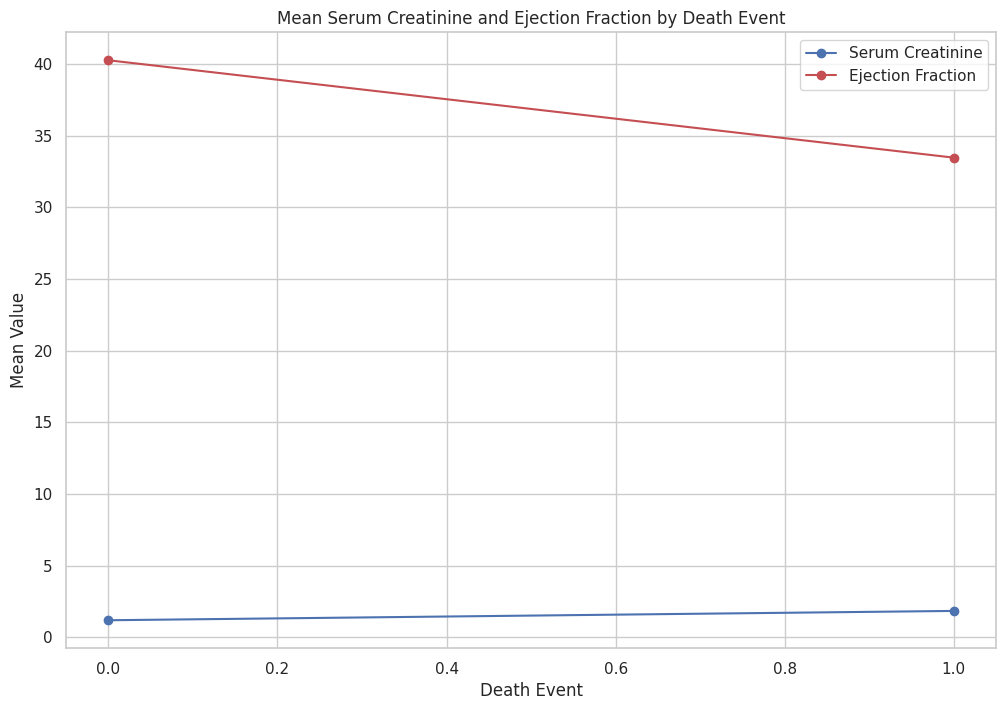

In [30]:


# Load the dataset
file_path = 'heart_failure_clinical_records_daataset.csv'
data = pd.read_csv(file_path)

# One-hot encoding the categorical columns 'sex' and 'smoking'
data_encoded = pd.get_dummies(data, columns=['sex', 'smoking'], drop_first=True)

# Grouping the data by DEATH_EVENT and calculating the mean values
mean_values = data_encoded.groupby('DEATH_EVENT')[['serum_creatinine', 'ejection_fraction']].mean().reset_index()

# Setting up the plot
plt.figure(figsize=(12, 8))

# Plotting the mean values for serum_creatinine and ejection_fraction
plt.plot(mean_values['DEATH_EVENT'], mean_values['serum_creatinine'], label='Serum Creatinine', color='b', marker='o')
plt.plot(mean_values['DEATH_EVENT'], mean_values['ejection_fraction'], label='Ejection Fraction', color='r', marker='o')

# Customizing the plot
plt.title('Mean Serum Creatinine and Ejection Fraction by Death Event')
plt.xlabel('Death Event')
plt.ylabel('Mean Value')
plt.legend()
plt.grid(True)
plt.show()


ANOVA

In [ ]:



# Load the data into a DataFrame (adjust the filename as needed)
df = pd.read_csv('heart_failure_clinical_records_daataset.csv')

# Display the first few rows of the dataframe to ensure it's loaded correctly
print(df.head())

# Prepare a list to store the results
anova_results = []

# Iterate over each column in the dataframe except the target column 'DEATH_EVENT'
for column in df.columns:
    if column != 'DEATH_EVENT':
        # Check if the column is categorical or numerical
        if df[column].dtype == 'object' or len(df[column].unique()) < 10:
            # Convert categorical columns to numeric using LabelEncoder
            le = LabelEncoder()
            df[column] = le.fit_transform(df[column])

        # Split the data into groups based on 'DEATH_EVENT'
        groups = [df[df['DEATH_EVENT'] == val][column] for val in df['DEATH_EVENT'].unique()]

        # Perform the one-way ANOVA
        f_val, p_val = f_oneway(*groups)

        # Store the result
        anova_results.append((column, f_val, p_val))

# Print the results
for column, f_val, p_val in anova_results:
    print(f"ANOVA for {column} and DEATH_EVENT:")
    print(f"F-Value: {f_val}")
    print(f"P-Value: {p_val}\n")


    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  DEATH_EVENT  
0        0            1  
1        0            1  
2        1            1  


    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  DEATH_EVENT  
0        0            1  
1        0            1  
2        1            1  


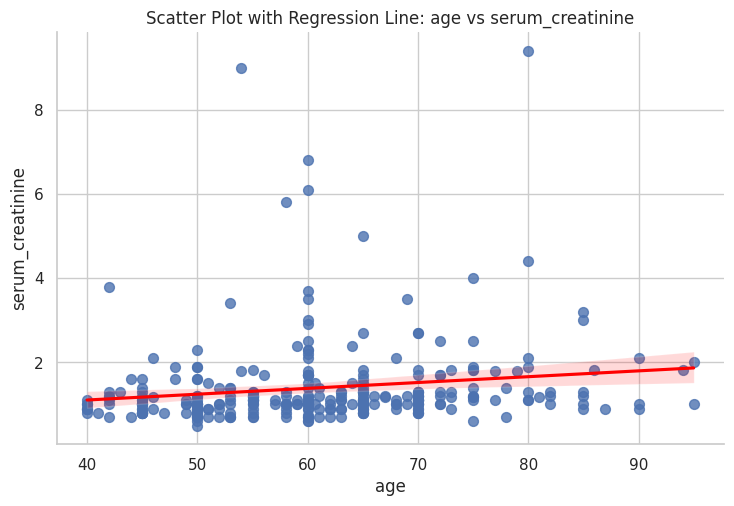

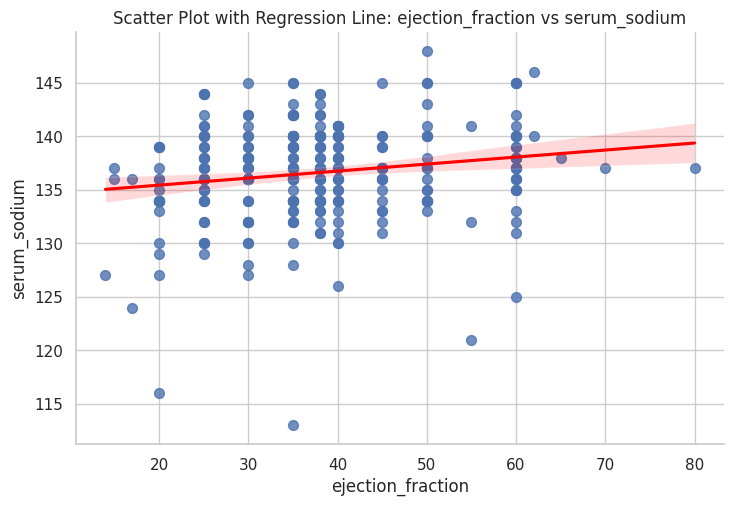

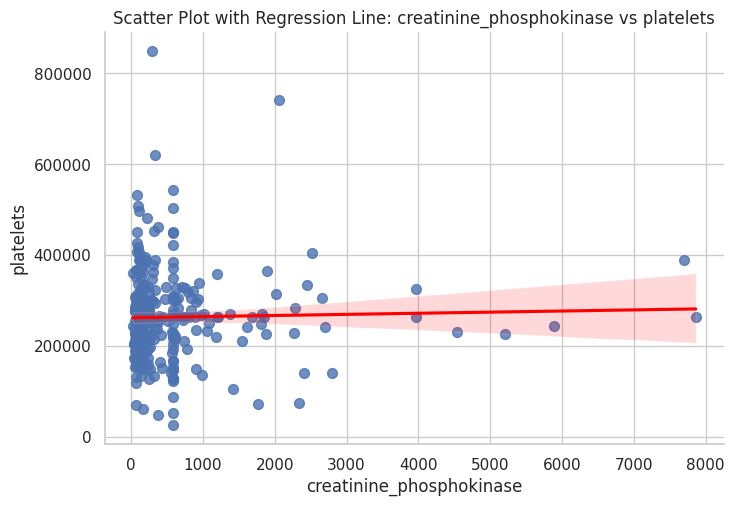

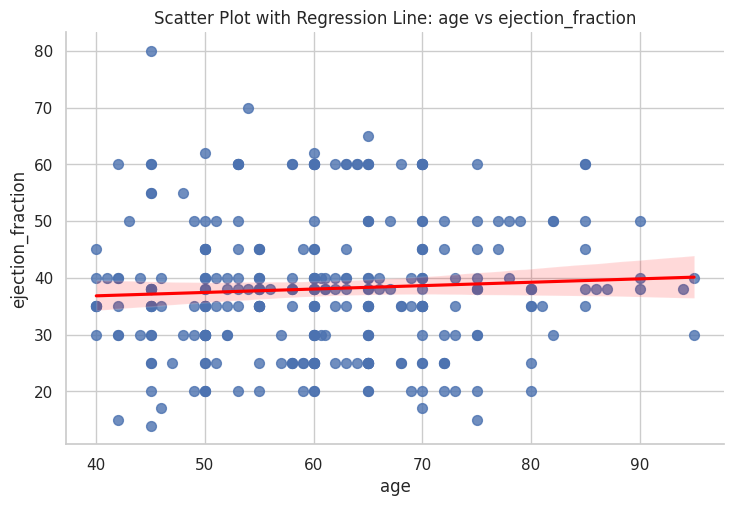

Target: DEATH_EVENT
Model Coefficients: [0.01104316]
Model Intercept: -0.37722369882466084
Model Score (R^2): -0.06354790051894543


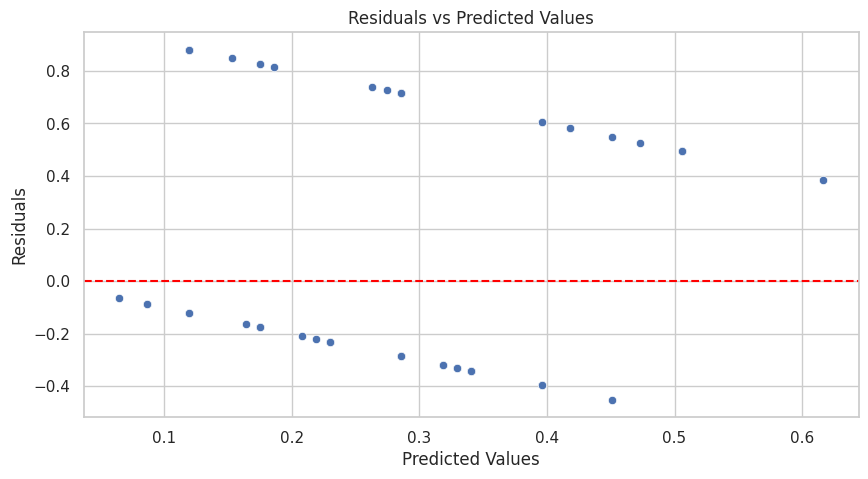

Target: DEATH_EVENT
Model Coefficients: [0.15027595]
Model Intercept: 0.08858367724939048
Model Score (R^2): -0.042224397434794225


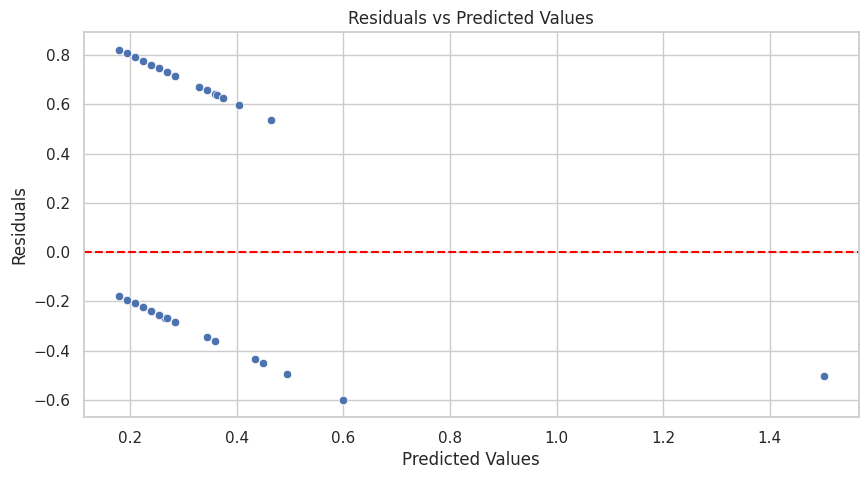

Target: DEATH_EVENT
Model Coefficients: [-0.0101124]
Model Intercept: 0.684008041746215
Model Score (R^2): 0.038053491355620306


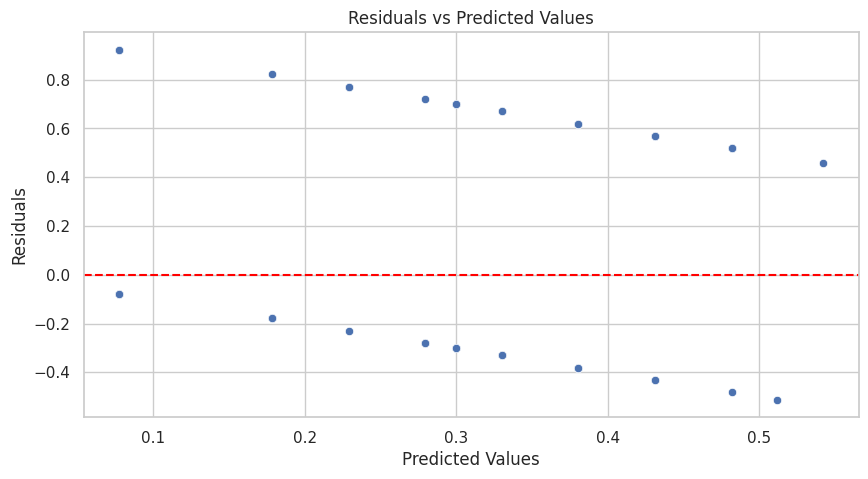

Target: DEATH_EVENT
Model Coefficients: [-2.84838753e-07]
Model Intercept: 0.37182063729560977
Model Score (R^2): -0.06057137847401939


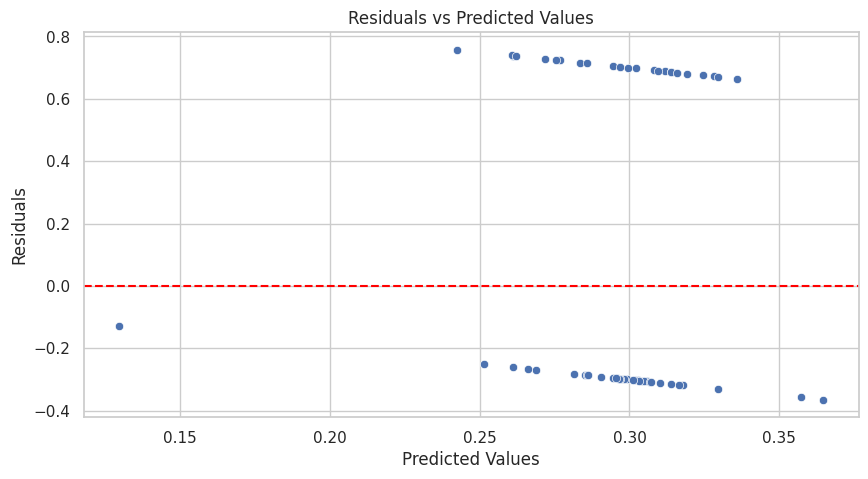

Target: DEATH_EVENT
Model Coefficients: [-0.01954476]
Model Intercept: 2.96333596688502
Model Score (R^2): -0.016292249038726725


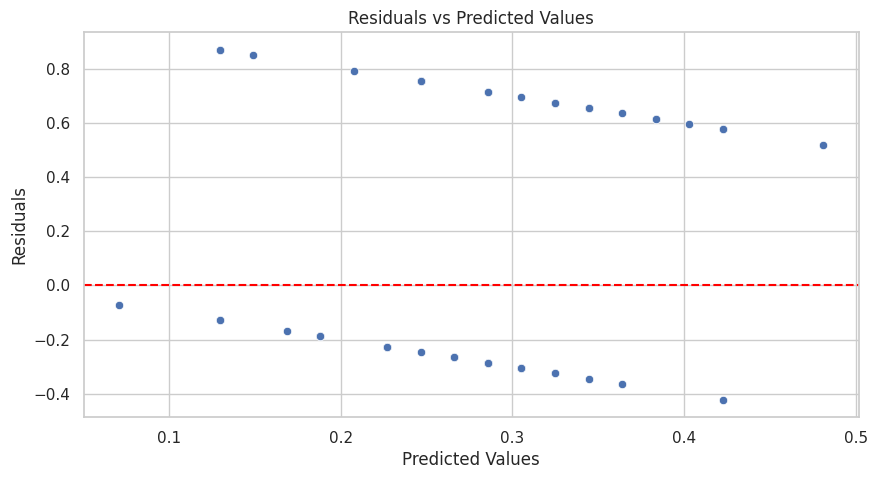

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the data into a DataFrame
df = pd.read_csv('heart_failure_clinical_records_daataset.csv')

# Display the first few rows of the dataframe to ensure it's loaded correctly
print(df.head())

# Define the function for scatter plot with regression
def scatter_plot_with_regression(x, y, df):
    sns.lmplot(x=x, y=y, data=df, aspect=1.5, scatter_kws={'s': 50}, line_kws={'color': 'red'})
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'Scatter Plot with Regression Line: {x} vs {y}')
    plt.show()

# Define the function for linear regression modeling and evaluation
def linear_regression_model(target, features, df):
    X = df[features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    # Evaluate the model
    print(f'Target: {target}')
    print(f'Model Coefficients: {model.coef_}')
    print(f'Model Intercept: {model.intercept_}')
    print(f'Model Score (R^2): {model.score(X_test, y_test)}')

    # Predicting and plotting residuals
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred

    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=y_pred, y=residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residuals vs Predicted Values')
    plt.show()

# List of hypothesis columns (pairs of columns to plot for scatter plot with regression)
hypotheses_columns = [
    ('age', 'serum_creatinine'),
    ('ejection_fraction', 'serum_sodium'),
    ('creatinine_phosphokinase', 'platelets'),
    ('age', 'ejection_fraction')
]

# Plotting scatter plots for each hypothesis
for x, y in hypotheses_columns:
    scatter_plot_with_regression(x, y, df)

# List of target and feature columns for each hypothesis in linear regression modeling
hypotheses_targets_features = [
    ('DEATH_EVENT', ['age']),
    ('DEATH_EVENT', ['serum_creatinine']),
    ('DEATH_EVENT', ['ejection_fraction']),
    ('DEATH_EVENT', ['platelets']),
    ('DEATH_EVENT', ['serum_sodium'])
]

# Apply linear regression for each hypothesis
for target, features in hypotheses_targets_features:
    linear_regression_model(target, features, df)
